# IMPORTING IMPORTANT MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the csv data and converting it into DataFrame

In [2]:
df=pd.read_csv("kidney_disease.csv")
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Converting column name to user readability form

In [4]:
columns=pd.read_csv("cols.txt",sep="-")
columns=columns.reset_index()

In [5]:
columns.columns=['cols','full_form']
columns

cols                full_form
0               id                       id
1              age                      age
2               bp           blood_pressure
3               sg         specific_gravity
4               al                  albumin
5               su                    sugar
6              rbc          red_blood_cells
7               pc                pus_cells
8              pcc          pus_cell_clumps
9               ba                 bacteria
10             bgr     blood_glucose_random
11              bu               blood_urea
12              sc         serum_creatinine
13             sod                   sodium
14             pot                potassium
15            hemo              heamoglobin
16             pcv       packed_cell_volume
17              wc   white_blood_cell_count
18              rc     red_blood_cell_count
19             htn             hypertension
20              dm        diabetes_mellitus
21             cad  coronary_artery_disease
22           appet                 appetite
23              pe               pedaledema
24             ane                   anemia
25  classification                    class

In [6]:
df.columns=columns["full_form"].values

In [7]:
df.head()

id   age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

  pus_cells pus_cell_clumps    bacteria  ...  packed_cell_volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                    7800                   5.2           yes   
1                    6000                   NaN            no   
2                    7500                   NaN            no   
3                    6700                   3.9           yes   
4                    7300                   4.6            no   

   diabetes_mellitus  coronary_artery_disease appetite pedaledema anemia class  
0                yes                       no     good         no     no   ckd  
1                 no                       no     good         no     no   ckd  
2                yes                       no     poor         no    yes   ckd  
3                 no                       no     poor        yes    yes   ckd  
4                 no                       no     good         no     no   ckd  

[5 rows x 26 columns]

##### Checking data types of each column

In [8]:
df.dtypes

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cells                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
heamoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedaledema                  object
anemia                      object
class                       object
dtype: object

In [9]:
df.drop_duplicates(keep="first")

id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cells pus_cells pus_cell_clumps    bacteria  ...  \
0               NaN    normal      notpresent  notpresent  ...   
1               NaN    normal      notpresent  notpresent  ...   
2            normal    normal      notpresent  notpresent  ...   
3            normal  abnormal         present  notpresent  ...   
4            normal    normal      notpresent  notpresent  ...   
..              ...       ...             ...         ...  ...   
395          normal    normal      notpresent  notpresent  ...   
396          normal    normal      notpresent  notpresent  ...   
397          normal    normal      notpresent  notpresent  ...   
398          normal    normal      notpresent  notpresent  ...   
399          normal    normal      notpresent  notpresent  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                    44                    7800                   5.2   
1                    38                    6000                   NaN   
2                    31                    7500                   NaN   
3                    32                    6700                   3.9   
4                    35                    7300                   4.6   
..                  ...                     ...                   ...   
395                  47                    6700                   4.9   
396                  54                    7800                   6.2   
397                  49                    6600                   5.4   
398                  51                    7200                   5.9   
399                  53                    6800                   6.1   

     hypertension  diabetes_mellitus  coronary_artery_disease appetite  \
0             yes                yes                       no     good   
1              no                 no                       no     good   
2              no                yes                       no     poor   
3             yes                 no                       no     poor   
4              no                 no                       no     good   
..            ...                ...                      ...      ...   
395            no                 no                       no     good   
396            no                 no                       no     good   
397            no                 no                       no     good   
398            no                 no                       no     good   
399            no                 no                       no     good   

    pedaledema anemia   class  
0           no     no     ckd  
1           no     no     ckd  
2           no    yes     ckd  
3          yes    yes     ckd  
4           no     no     ckd  
..         ...    ...     ...  
395         no     no  notckd  
396         no     no  notckd  
397         no     no  notckd  
398         no     no  notckd  
399         no     no  notckd  

[400 rows x 26 columns]

In [10]:
a=df[df["class"]=="ckd"].shape[0]/df.shape[0]*100
print("Total Number of people having chronic kidney disease:", a,"%")

Total Number of people having chronic kidney disease: 62.0 %


In [11]:
df.drop("id",axis=1,inplace=True)    #no use of id column in our dataset.

In [12]:
def convert_dtypes(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors="coerce")
    

In [13]:
features=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for feature in features:
    convert_dtypes(df,feature)

In [14]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cells                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
heamoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedaledema                  object
anemia                      object
class                       object
dtype: object

##### Dividing the DataFrame into categorical and numeric columns.

In [15]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=="object"]
    num_col=[col for col in df.columns if df[col].dtype!="object"]
    return cat_col, num_col

In [16]:
cat_col,num_col=extract_cat_num(df)

In [17]:
cat_col

['red_blood_cells',
 'pus_cells',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedaledema',
 'anemia',
 'class']

In [18]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'heamoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

##### Checking for mistyped and null columns

In [19]:
for col in num_col:
    print(f"{col} has {df[col].unique()} values")
    print("\n")

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values


blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values


specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values


albumin has [ 1.  4.  2.  3.  0. nan  5.] values


sugar has [ 0.  3.  4.  1. nan  2.  5.] values


blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115. 

In [20]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values")
    print("\n")

red_blood_cells has [nan 'normal' 'abnormal'] values


pus_cells has ['normal' 'abnormal' nan] values


pus_cell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary_artery_disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedaledema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




##### Replacing the columns having mistyped values.

In [21]:
df["diabetes_mellitus"].replace(to_replace={"\tno":"no",'\tyes':'yes'},inplace=True)
df["coronary_artery_disease"].replace(to_replace={"\tno":"no"},inplace=True)
df["class"]=df["class"].replace(to_replace="ckd\t",value="ckd")

In [22]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values")
    print("\n")

red_blood_cells has [nan 'normal' 'abnormal'] values


pus_cells has ['normal' 'abnormal' nan] values


pus_cell_clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes_mellitus has ['yes' 'no' ' yes' nan] values


coronary_artery_disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedaledema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




# DATA VISUALISATION

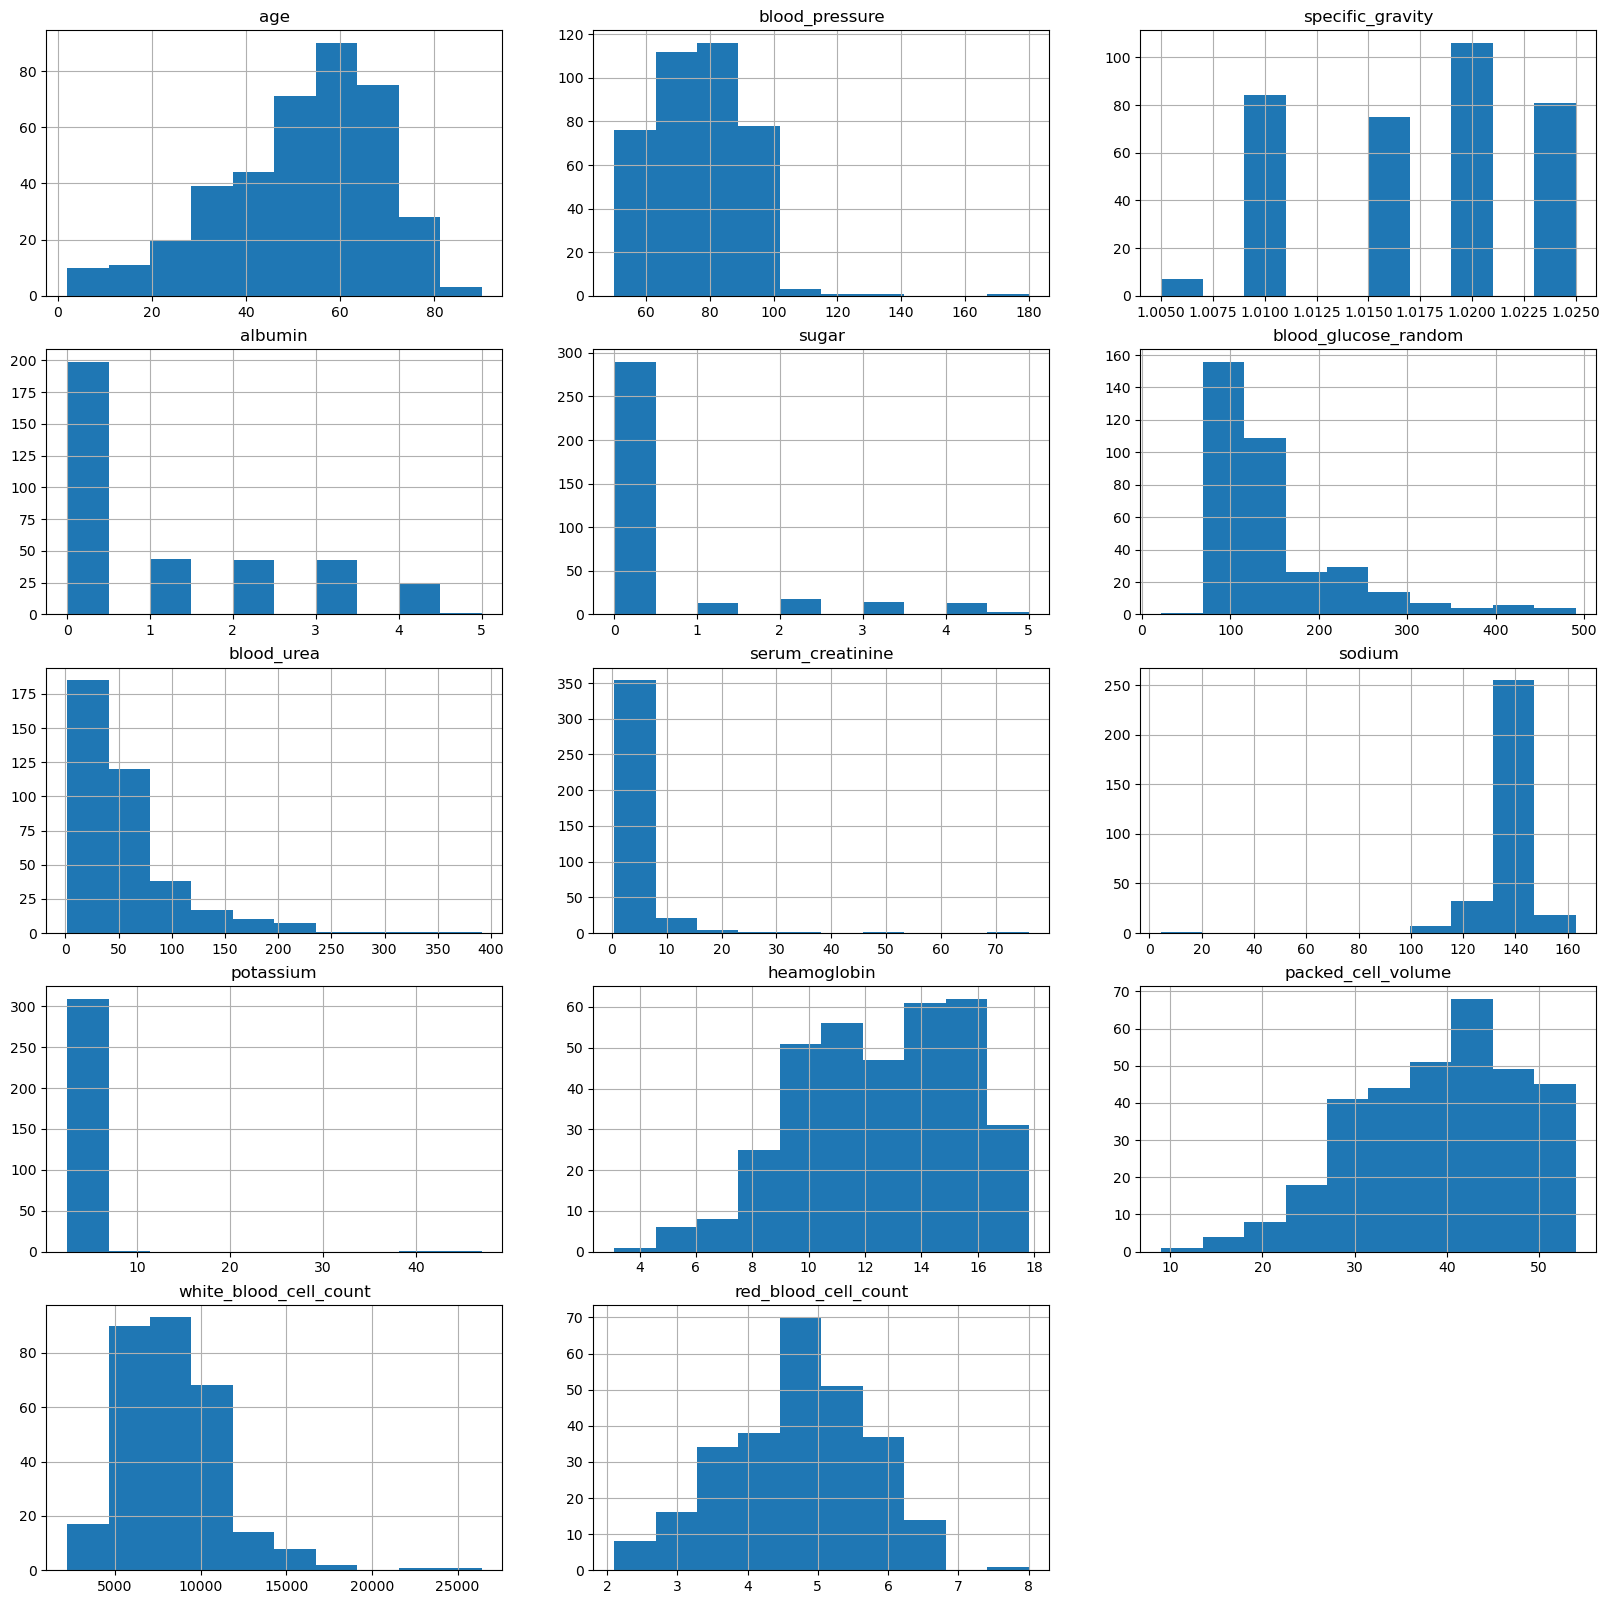

In [23]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

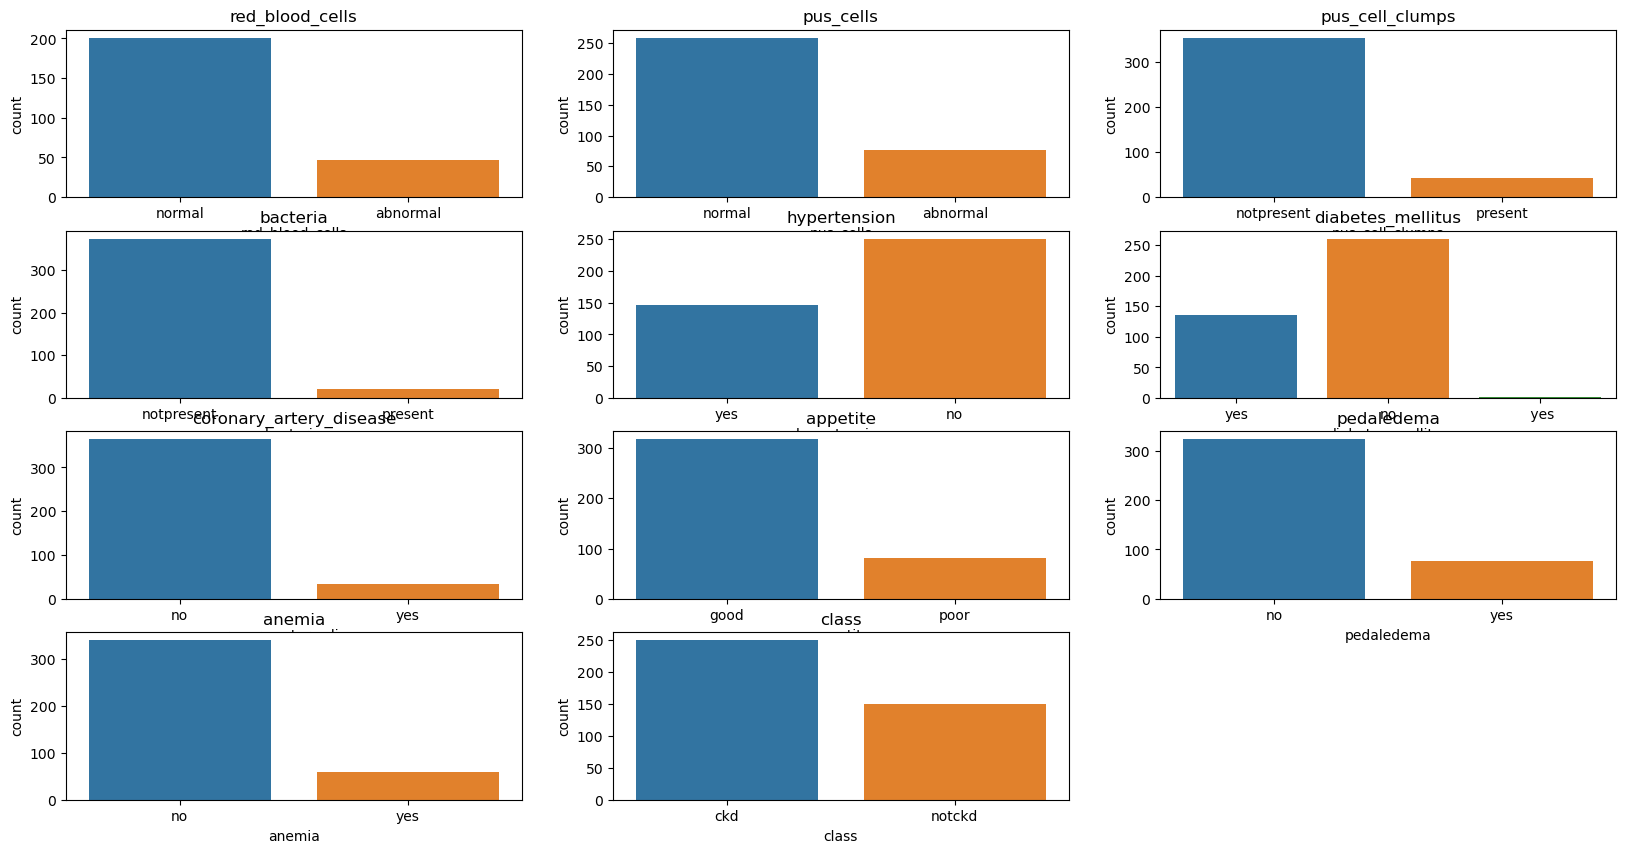

In [24]:
plt.figure(figsize=(20,10))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(data=df,x=feature)
    plt.title(feature)
    

<Axes: xlabel='class', ylabel='count'>

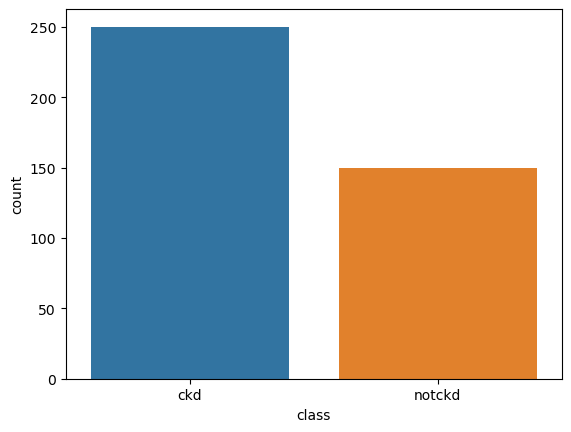

In [25]:
sns.countplot(data=df,x="class")

In [26]:
df.groupby(["red_blood_cells","class"])["red_blood_cell_count"].agg(["count","mean","median","min","max"])

count      mean  median  min  max
red_blood_cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [27]:
import plotly.express as px

In [28]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'heamoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedaledema', 'anemia', 'class'],
      dtype='object')

In [29]:
px.violin(df,y='red_blood_cell_count',x="class",color="class")

In [30]:
#The above violin plot represents the data distribution of red blood cells.

In [31]:
px.scatter(df,x="heamoglobin",y="packed_cell_volume")

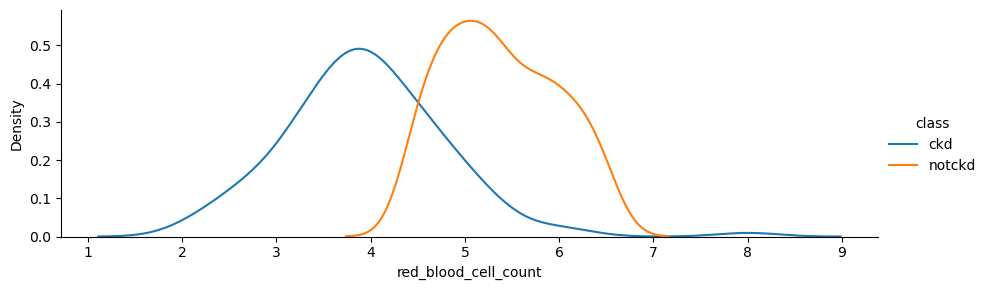

In [32]:
grid=sns.FacetGrid(df,hue="class",aspect=3)
grid.map(sns.kdeplot,'red_blood_cell_count')
grid.add_legend()

In [33]:
def violin(col):
    fig=px.violin(df,y=col,x="class",color="class",box=True)
    return fig.show()

In [34]:
def scatter(col1,col2):
    fig=px.scatter(df,x=col1,y=col2,color="class")
    return fig.show()

In [35]:
def kde_plot(feature):
    grid=sns.FacetGrid(df,hue="class",aspect=3)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

In [36]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'heamoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

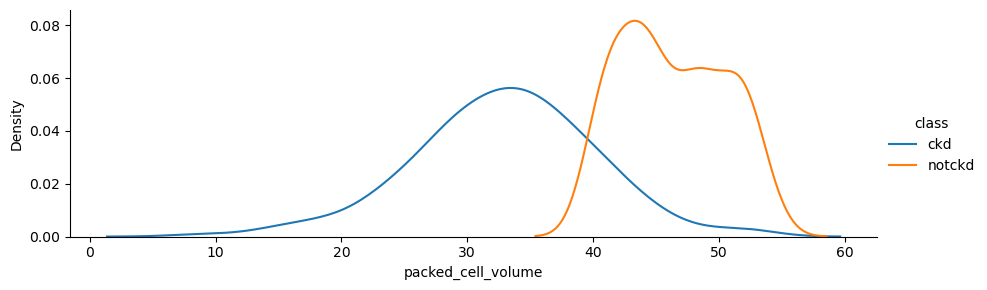

In [37]:
kde_plot("packed_cell_volume")

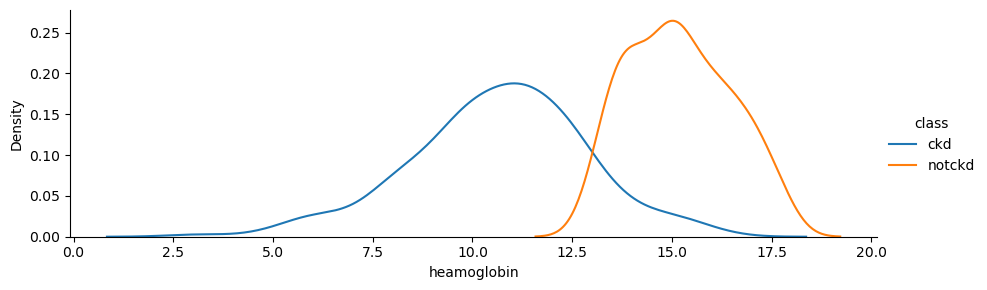

In [38]:
kde_plot("heamoglobin")

In [39]:
scatter("red_blood_cell_count","packed_cell_volume")

In [40]:
scatter("packed_cell_volume","heamoglobin")

In [41]:
violin("red_blood_cell_count")

In [42]:
violin("packed_cell_volume")

In [43]:
scatter("red_blood_cell_count","albumin")

# DATA CLEANING(HANDLING MISSING VALUES )

In [44]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cells                   65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
heamoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedaledema                   1
anemia                       1
class                        0
dtype: int64

<Axes: xlabel='red_blood_cells', ylabel='count'>

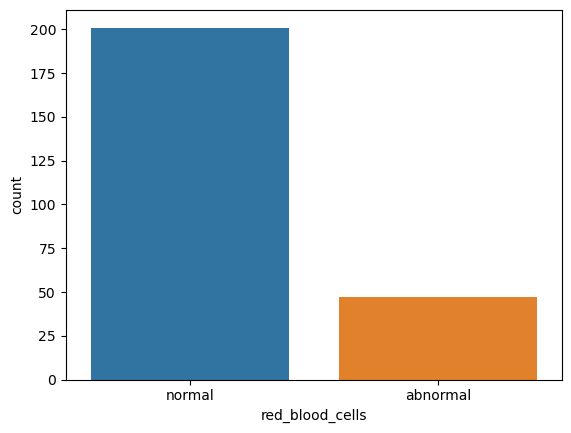

In [45]:
sns.countplot(data=df,x="red_blood_cells")

# Exploratory Data Analysis

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df1=pd.DataFrame(si.fit_transform(df))
df1.columns=df.columns #to give the same column names as that of df
df1

age blood_pressure specific_gravity albumin sugar red_blood_cells  \
0    48.0           80.0             1.02     1.0   0.0          normal   
1     7.0           50.0             1.02     4.0   0.0          normal   
2    62.0           80.0             1.01     2.0   3.0          normal   
3    48.0           70.0            1.005     4.0   0.0          normal   
4    51.0           80.0             1.01     2.0   0.0          normal   
..    ...            ...              ...     ...   ...             ...   
395  55.0           80.0             1.02     0.0   0.0          normal   
396  42.0           70.0            1.025     0.0   0.0          normal   
397  12.0           80.0             1.02     0.0   0.0          normal   
398  17.0           60.0            1.025     0.0   0.0          normal   
399  58.0           80.0            1.025     0.0   0.0          normal   

    pus_cells pus_cell_clumps    bacteria blood_glucose_random  ...  \
0      normal      notpresent  notpresent                121.0  ...   
1      normal      notpresent  notpresent                 99.0  ...   
2      normal      notpresent  notpresent                423.0  ...   
3    abnormal         present  notpresent                117.0  ...   
4      normal      notpresent  notpresent                106.0  ...   
..        ...             ...         ...                  ...  ...   
395    normal      notpresent  notpresent                140.0  ...   
396    normal      notpresent  notpresent                 75.0  ...   
397    normal      notpresent  notpresent                100.0  ...   
398    normal      notpresent  notpresent                114.0  ...   
399    normal      notpresent  notpresent                131.0  ...   

    packed_cell_volume white_blood_cell_count red_blood_cell_count  \
0                 44.0                 7800.0                  5.2   
1                 38.0                 6000.0                  5.2   
2                 31.0                 7500.0                  5.2   
3                 32.0                 6700.0                  3.9   
4                 35.0                 7300.0                  4.6   
..                 ...                    ...                  ...   
395               47.0                 6700.0                  4.9   
396               54.0                 7800.0                  6.2   
397               49.0                 6600.0                  5.4   
398               51.0                 7200.0                  5.9   
399               53.0                 6800.0                  6.1   

    hypertension diabetes_mellitus coronary_artery_disease appetite  \
0            yes               yes                      no     good   
1             no                no                      no     good   
2             no               yes                      no     poor   
3            yes                no                      no     poor   
4             no                no                      no     good   
..           ...               ...                     ...      ...   
395           no                no                      no     good   
396           no                no                      no     good   
397           no                no                      no     good   
398           no                no                      no     good   
399           no                no                      no     good   

    pedaledema anemia   class  
0           no     no     ckd  
1           no     no     ckd  
2           no    yes     ckd  
3          yes    yes     ckd  
4           no     no     ckd  
..         ...    ...     ...  
395         no     no  notckd  
396         no     no  notckd  
397         no     no  notckd  
398         no     no  notckd  
399         no     no  notckd  

[400 rows x 25 columns]

In [48]:
df1.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cells                  0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
heamoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedaledema                 0
anemia                     0
class                      0
dtype: int64

In [49]:
df1["class"].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [50]:
df1.dtypes

age                        object
blood_pressure             object
specific_gravity           object
albumin                    object
sugar                      object
red_blood_cells            object
pus_cells                  object
pus_cell_clumps            object
bacteria                   object
blood_glucose_random       object
blood_urea                 object
serum_creatinine           object
sodium                     object
potassium                  object
heamoglobin                object
packed_cell_volume         object
white_blood_cell_count     object
red_blood_cell_count       object
hypertension               object
diabetes_mellitus          object
coronary_artery_disease    object
appetite                   object
pedaledema                 object
anemia                     object
class                      object
dtype: object

In [51]:
df.select_dtypes(exclude=["object"]).columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'heamoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'],
      dtype='object')

In [52]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df1[i]=df[i].apply(lambda x:float(x))

In [53]:
df1.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cells                   object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
heamoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedaledema                  object
anemia                      object
class                       object
dtype: object

In [54]:
#df1.to_csv("CKD1.csv")

# Encoding

In [55]:
for col in cat_col:
    print(f"{col} has {df1[col].nunique()} categories")

red_blood_cells has 2 categories
pus_cells has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes_mellitus has 3 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
pedaledema has 2 categories
anemia has 2 categories
class has 2 categories


In [56]:
from sklearn import preprocessing
newdf=df1.apply(preprocessing.LabelEncoder().fit_transform)
newdf

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0     40               3                 3        1      0                1   
1      5               0                 3        4      0                1   
2     54               3                 1        2      3                1   
3     40               2                 0        4      0                1   
4     43               3                 1        2      0                1   
..   ...             ...               ...      ...    ...              ...   
395   47               3                 3        0      0                1   
396   34               2                 4        0      0                1   
397    8               3                 3        0      0                1   
398   11               1                 4        0      0                1   
399   50               3                 4        0      0                1   

     pus_cells  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0            1                0         0                    48  ...   
1            1                0         0                   146  ...   
2            1                0         0                   140  ...   
3            0                1         0                    44  ...   
4            1                0         0                    33  ...   
..         ...              ...       ...                   ...  ...   
395          1                0         0                    64  ...   
396          1                0         0                     3  ...   
397          1                0         0                    27  ...   
398          1                0         0                    41  ...   
399          1                0         0                    57  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                    31                      35                    30   
1                    25                      19                    45   
2                    18                      33                    45   
3                    19                      25                    17   
4                    22                      31                    24   
..                  ...                     ...                   ...   
395                  34                      25                    27   
396                  41                      35                    40   
397                  36                      24                    32   
398                  38                      30                    37   
399                  40                      26                    39   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0               1                  2                        0         0   
1               0                  1                        0         0   
2               0                  2                        0         1   
3               1                  1                        0         1   
4               0                  1                        0         0   
..            ...                ...                      ...       ...   
395             0                  1                        0         0   
396             0                  1                        0         0   
397             0                  1                        0         0   
398             0                  1                        0         0   
399             0                  1                        0         0   

     pedaledema  anemia  class  
0             0       0      0  
1             0       0      0  
2             0       1      0  
3             1       1      0  
4             0       0      0  
..          ...     ...    ...  
395           0       0      1  
396           0       0      1  
397           0       0      1  
398           0       0      1  
399           0       0      1  

[400 rows x 25 c

# SKEWNESS

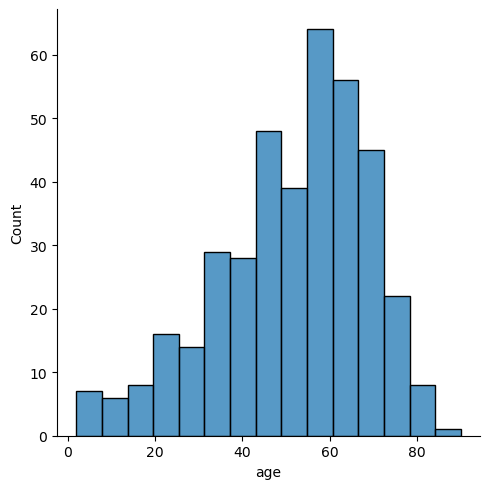

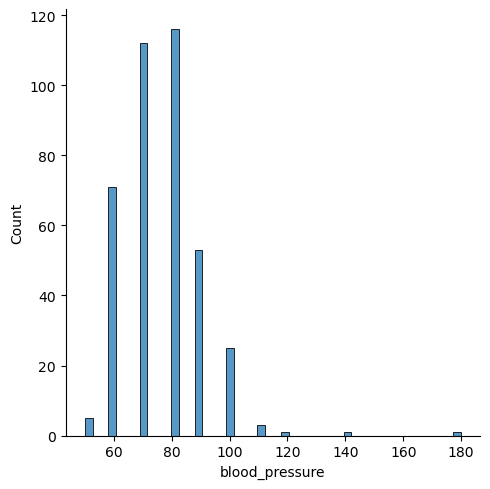

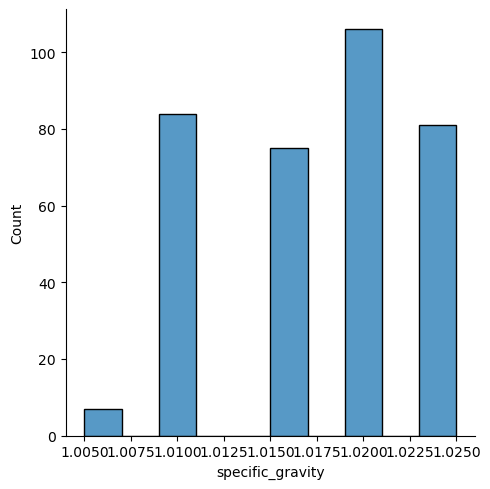

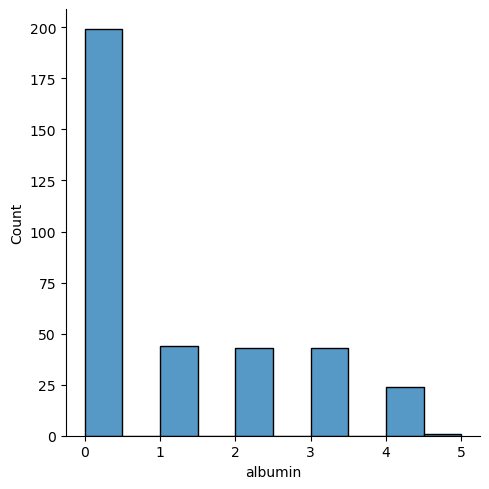

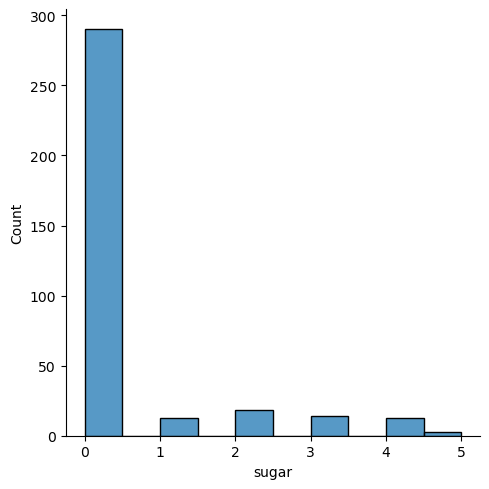

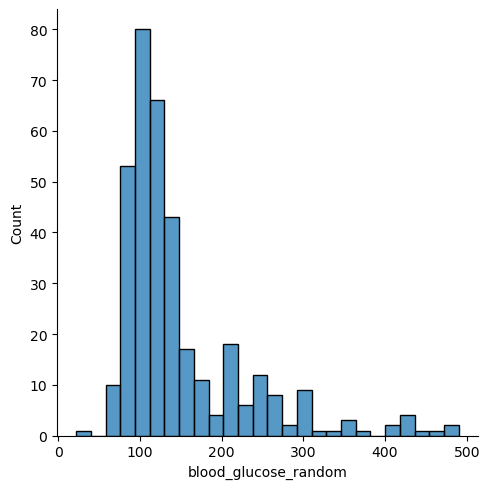

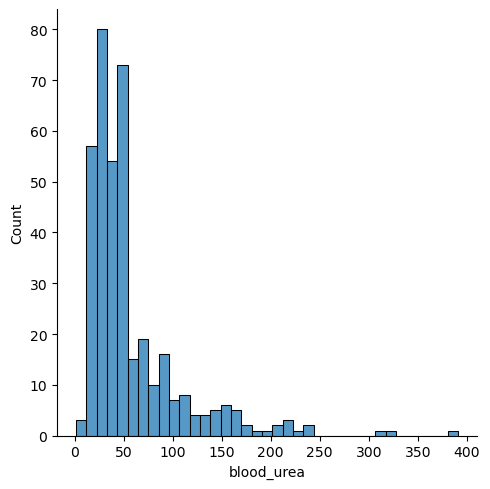

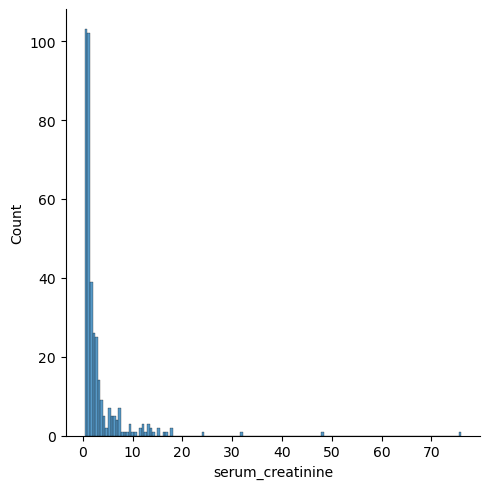

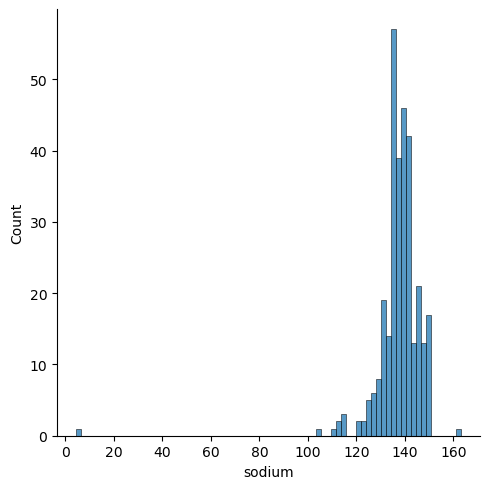

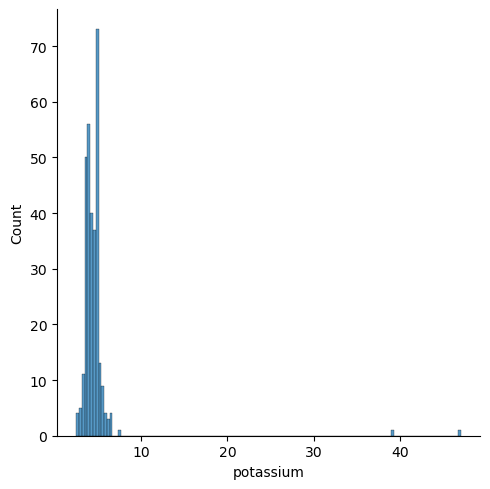

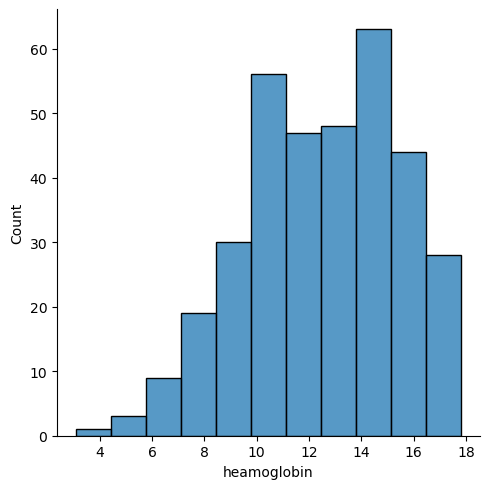

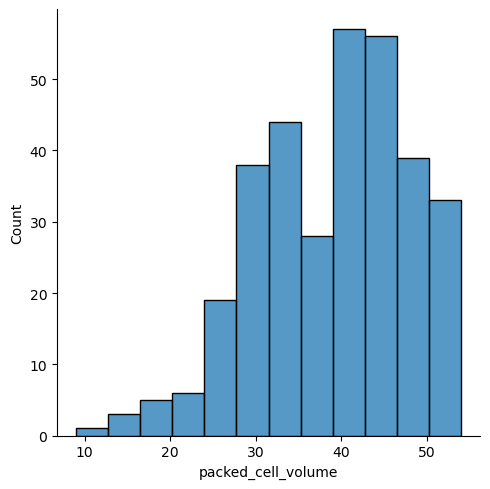

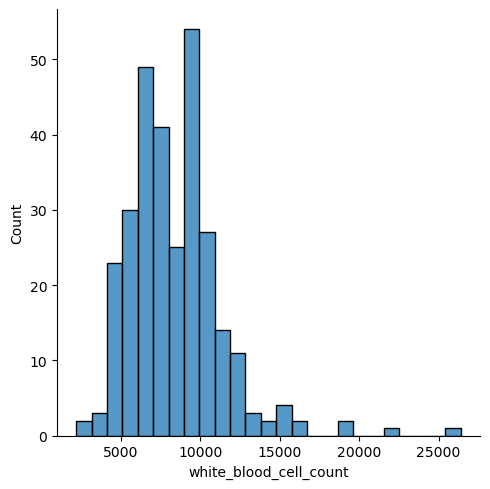

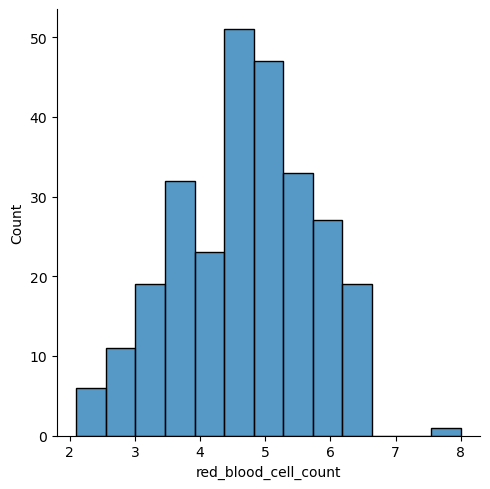

In [57]:
from scipy.stats import skew
def distplot(col):
    sns.displot(df[col])
    plt.xlabel(i)
    plt.show()

for i in list(df1.select_dtypes(exclude=["object"]).columns):
    distplot(i)

##### Finding correlation and skewness

<Axes: >

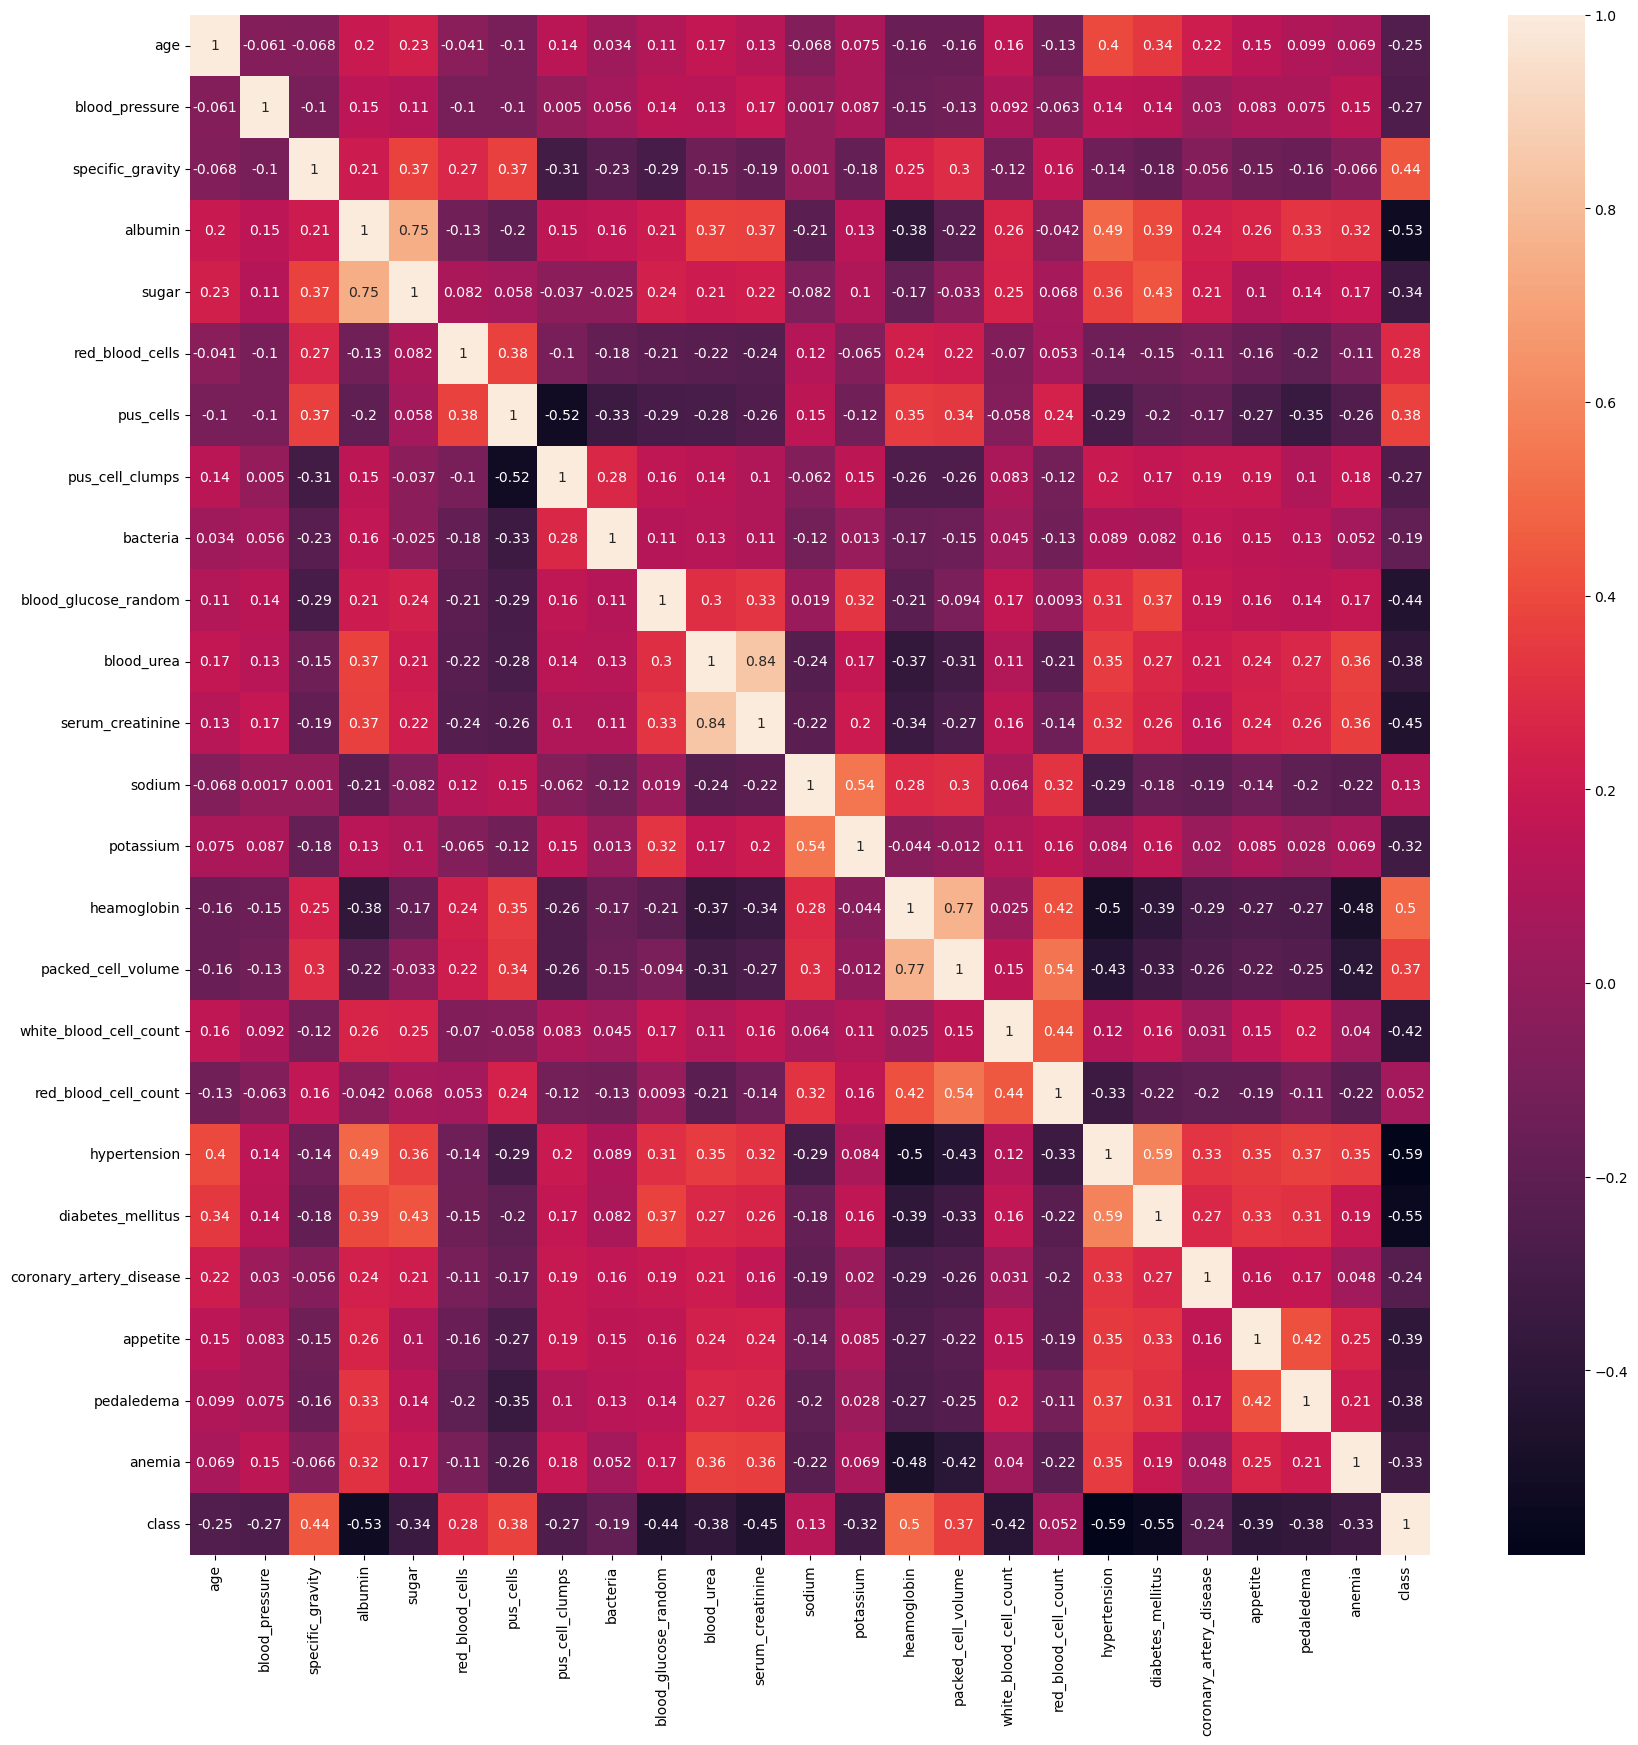

In [58]:
corr=newdf.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [59]:
skew(newdf)

array([-0.45930535,  2.01332791,  0.00837124,  1.07817881,  1.59532469,
       -2.3756647 , -1.5804195 ,  2.5770386 ,  3.90384672,  0.59393488,
        1.01919677,  1.51263604, -0.54762614,  0.4156336 , -0.14374902,
       -0.38529767,  0.03609616, -0.47174846,  0.54965089,  0.61856494,
        2.97617238,  1.46147542,  1.5804195 ,  1.96039212,  0.51639778])

In [60]:
colnames=newdf.columns
colnames

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'heamoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedaledema', 'anemia', 'class'],
      dtype='object')

age
-0.45930535416166696


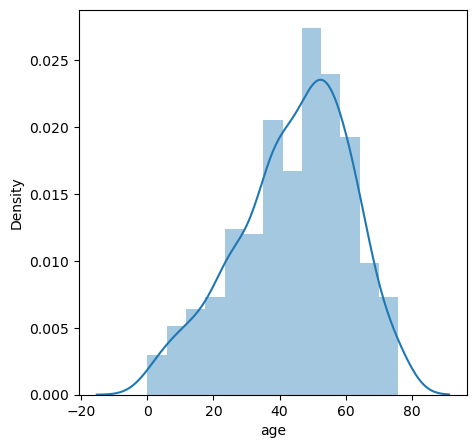

blood_pressure
2.013327907028398


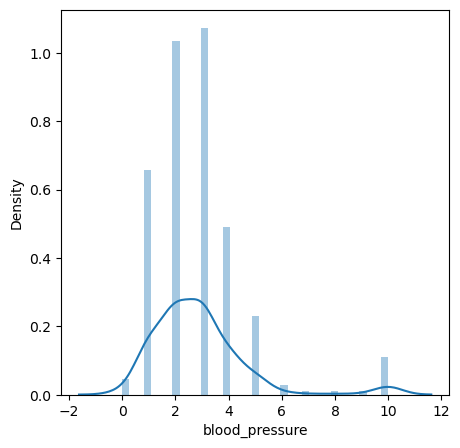

specific_gravity
0.008371238207241552


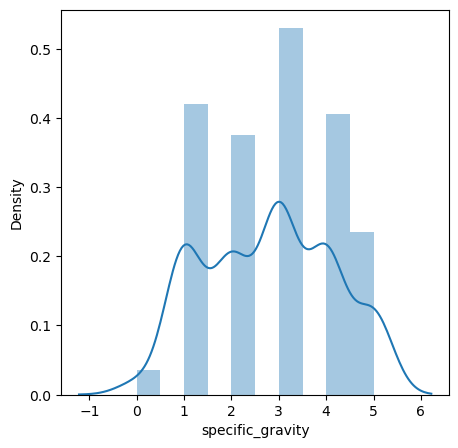

albumin
1.078178806210472


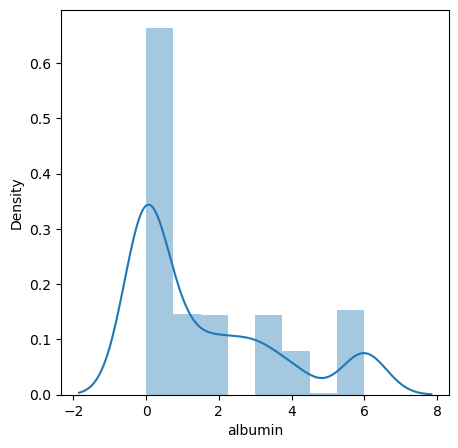

sugar
1.5953246947283863


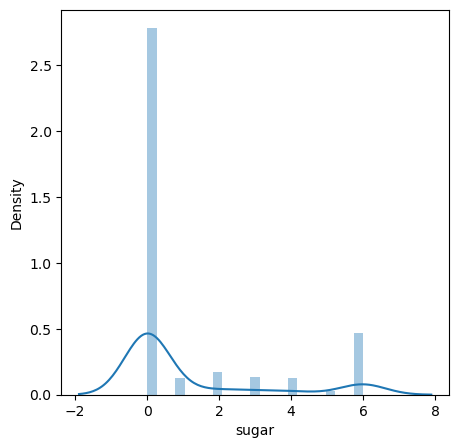

red_blood_cells
-2.3756647014663113


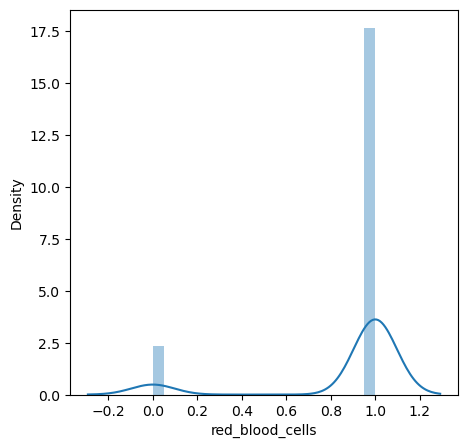

pus_cells
-1.580419499997204


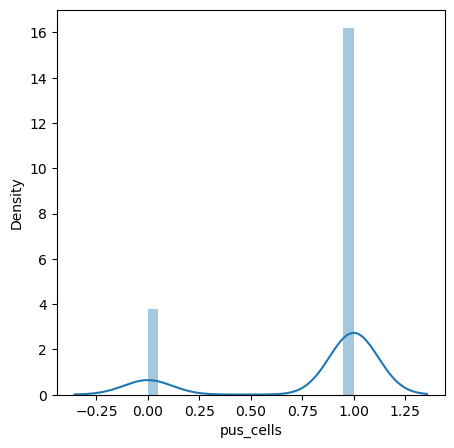

pus_cell_clumps
2.5770386026529972


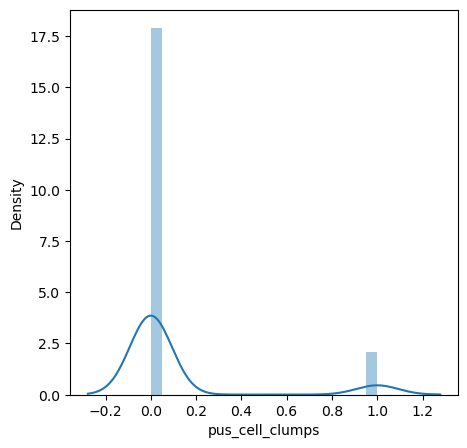

bacteria
3.903846723427961


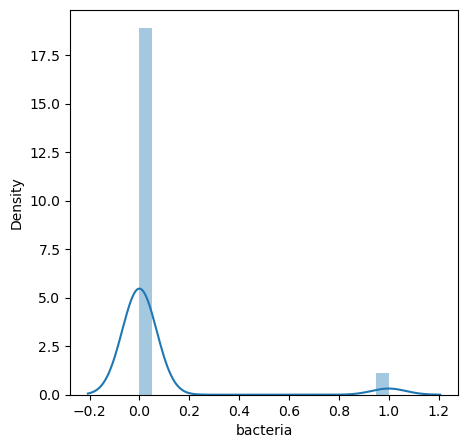

blood_glucose_random
0.5939348835606489


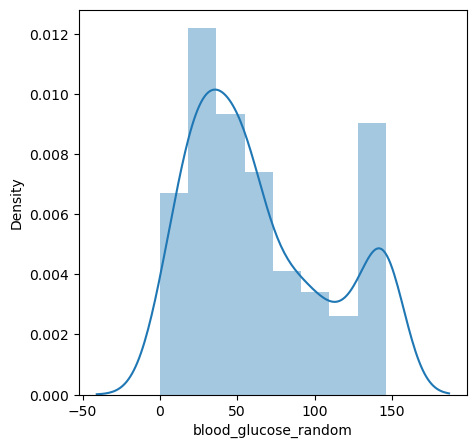

blood_urea
1.0191967720394863


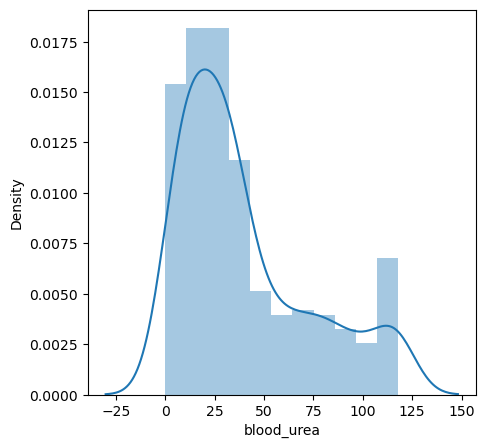

serum_creatinine
1.512636037520755


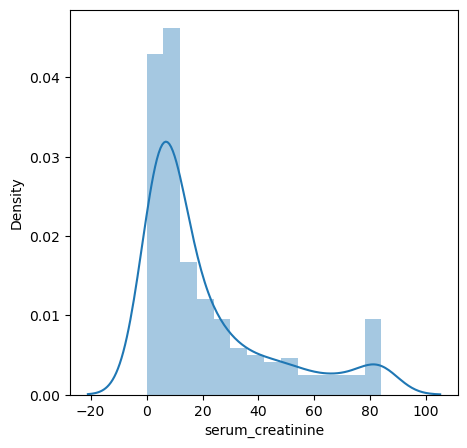

sodium
-0.5476261356297636


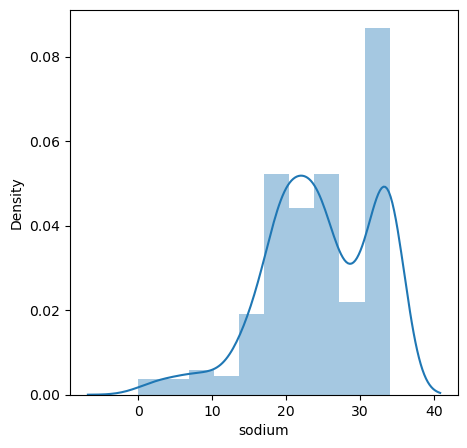

potassium
0.4156335954518722


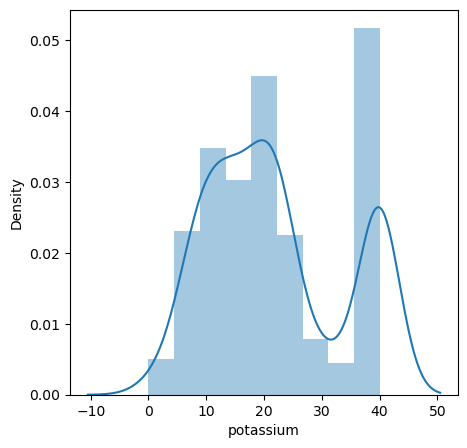

heamoglobin
-0.14374902465340592


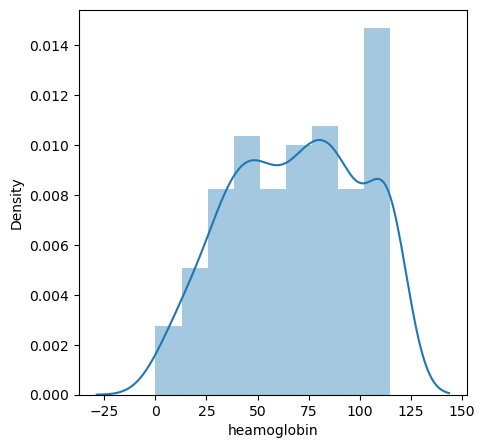

packed_cell_volume
-0.38529766961586925


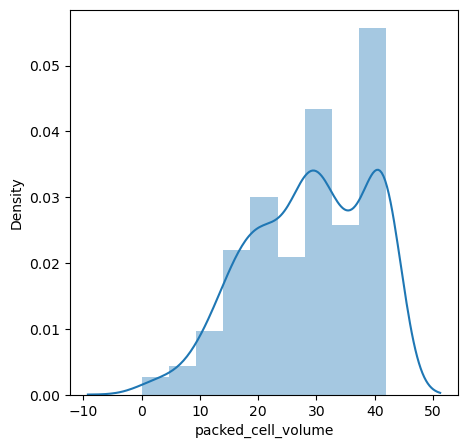

white_blood_cell_count
0.0360961561425352


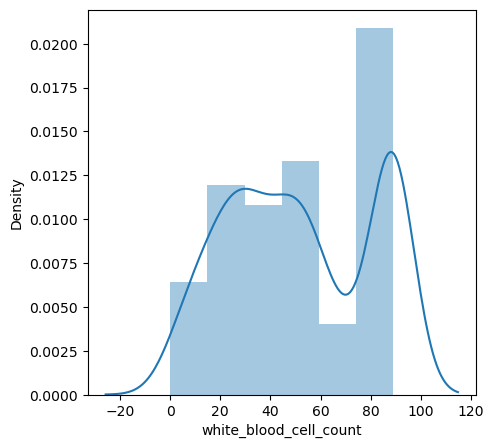

red_blood_cell_count
-0.4717484587059453


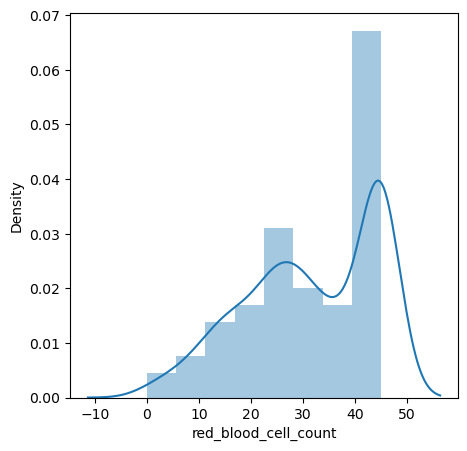

hypertension
0.5496508922564753


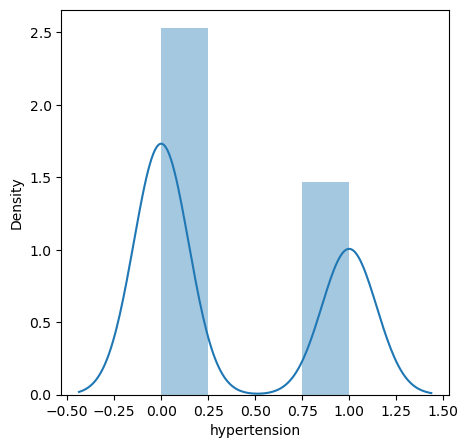

diabetes_mellitus
0.6185649391699354


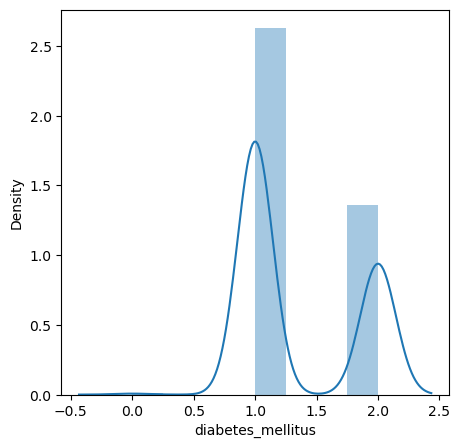

coronary_artery_disease
2.976172383652587


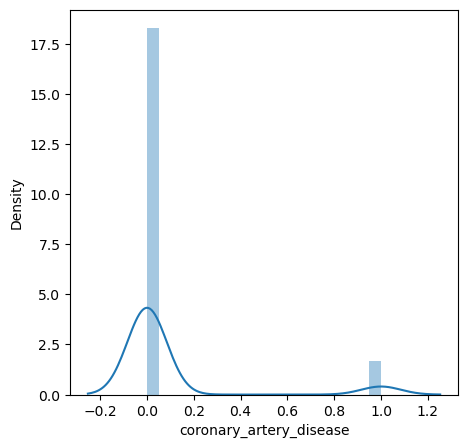

appetite
1.4614754242572576


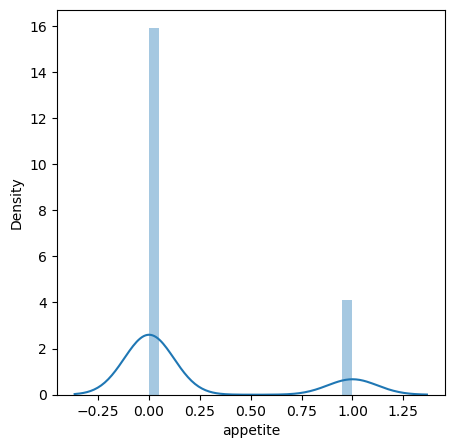

pedaledema
1.580419499997204


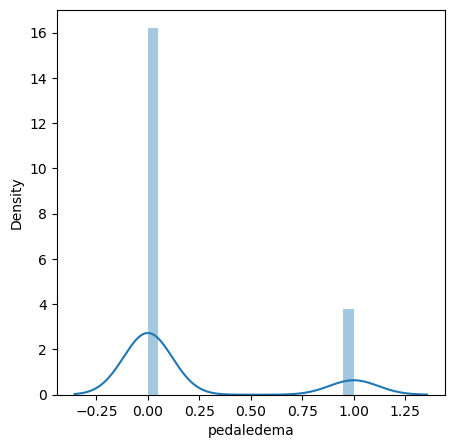

anemia
1.9603921176392143


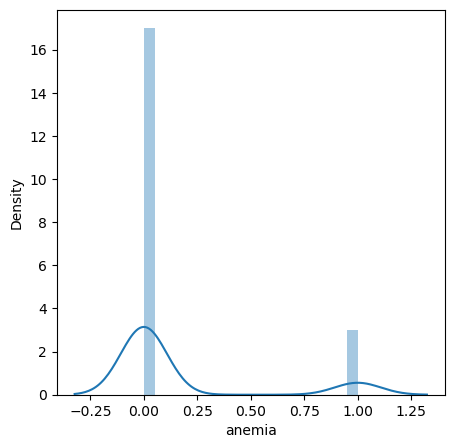

class
0.5163977794943223


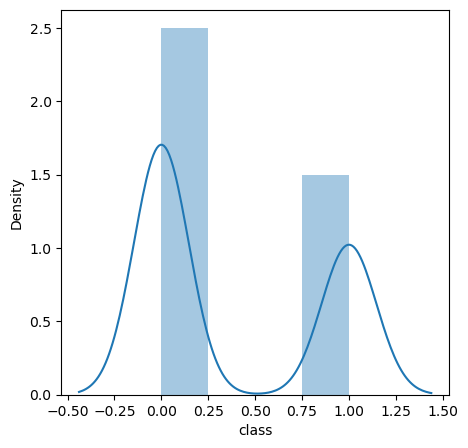

In [61]:
for i in newdf[colnames]:
    print(i)
    print(skew(newdf[i]))
    
    plt.figure(figsize=(5,5))
    sns.distplot(newdf[i],hist=True)
    plt.show()

In [62]:
skew(newdf)

array([-0.45930535,  2.01332791,  0.00837124,  1.07817881,  1.59532469,
       -2.3756647 , -1.5804195 ,  2.5770386 ,  3.90384672,  0.59393488,
        1.01919677,  1.51263604, -0.54762614,  0.4156336 , -0.14374902,
       -0.38529767,  0.03609616, -0.47174846,  0.54965089,  0.61856494,
        2.97617238,  1.46147542,  1.5804195 ,  1.96039212,  0.51639778])

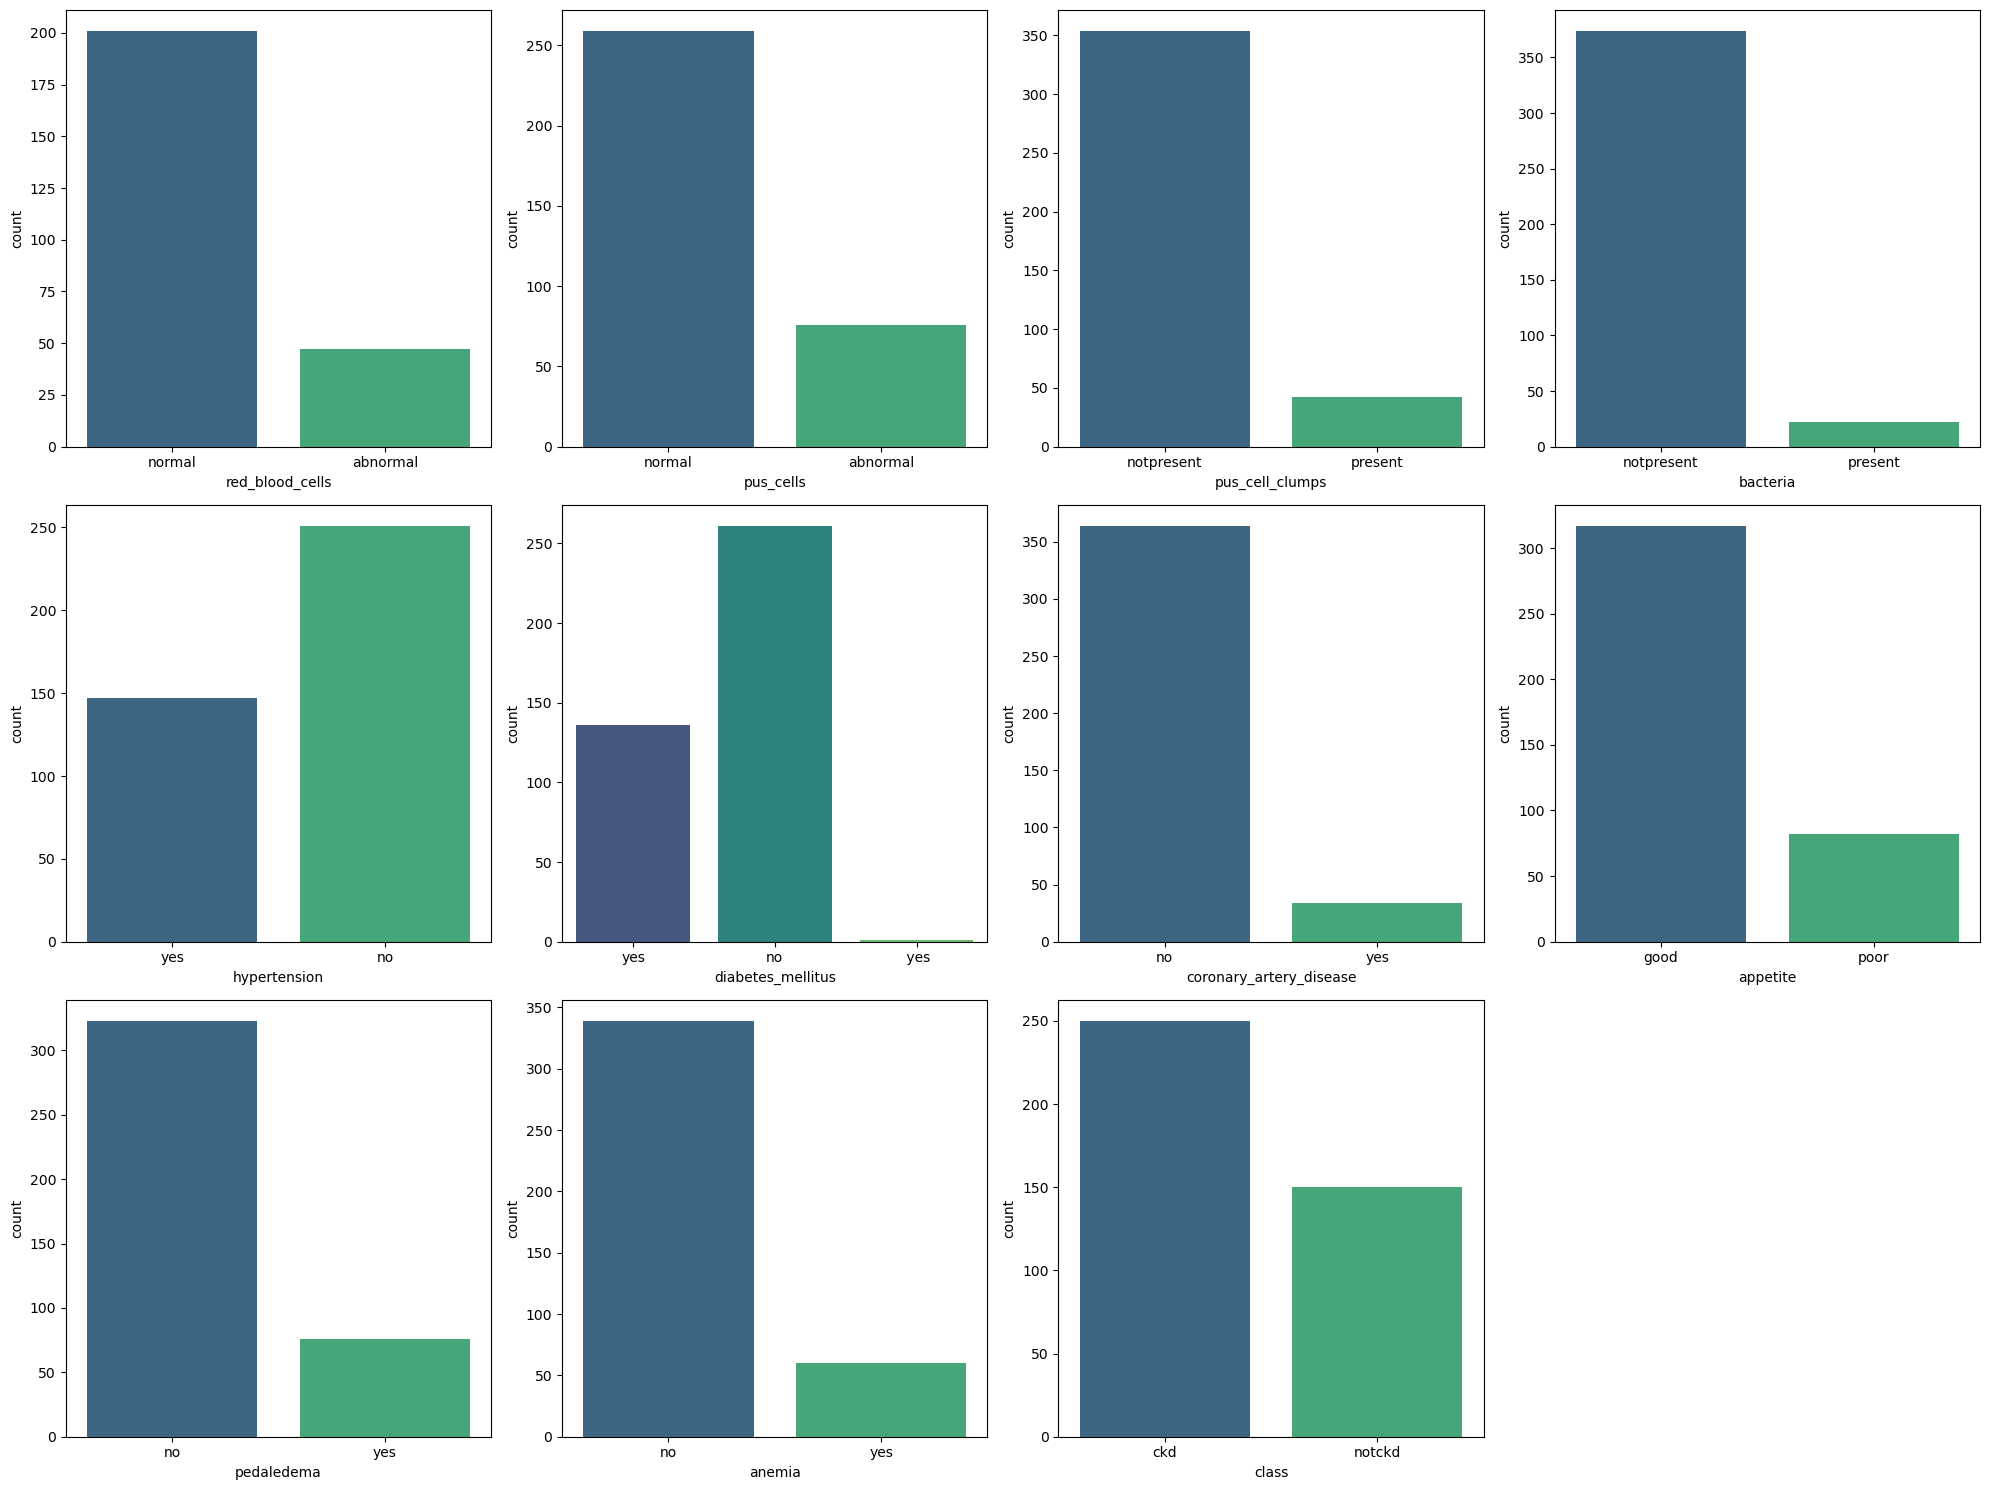

In [63]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df1,x=df[column], palette = 'viridis')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# OUTLIERS DETECTION 

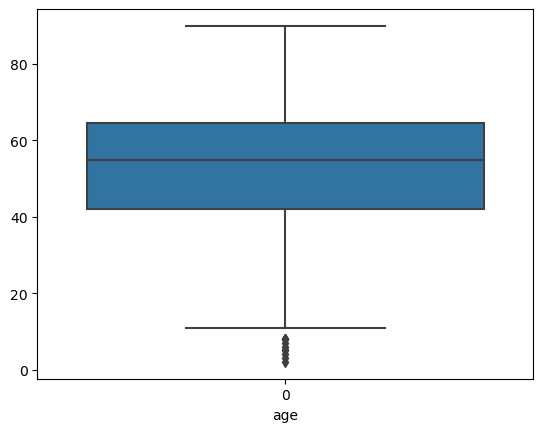

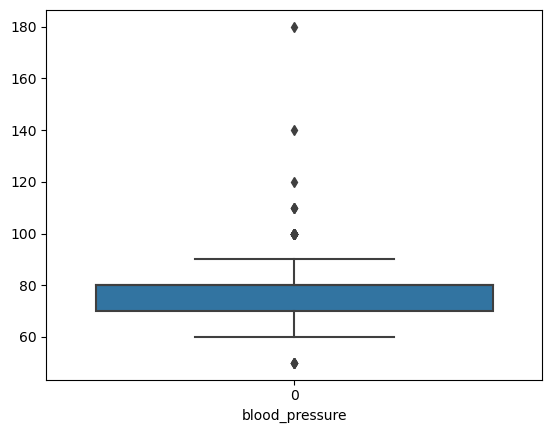

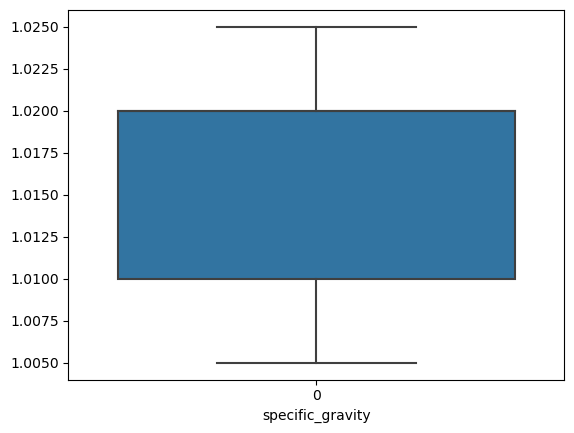

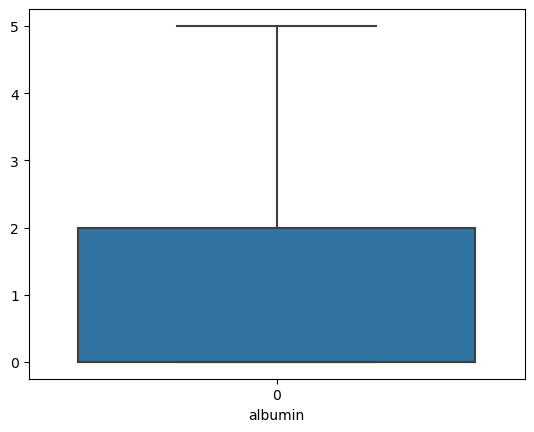

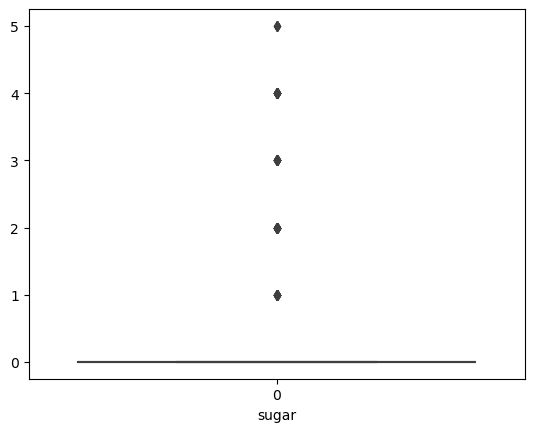

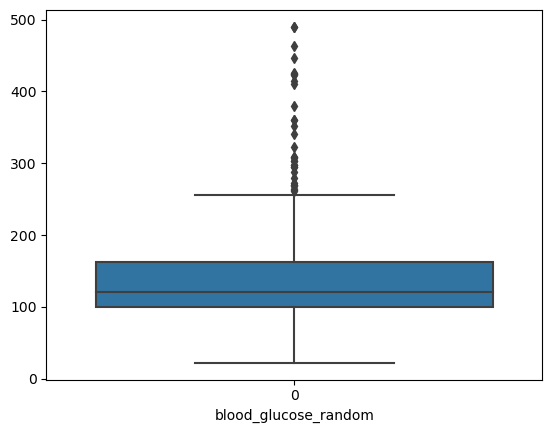

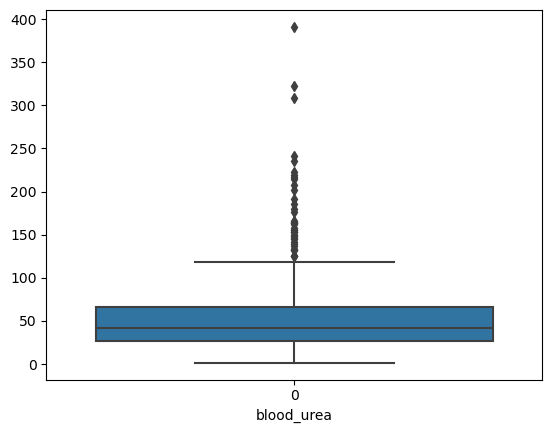

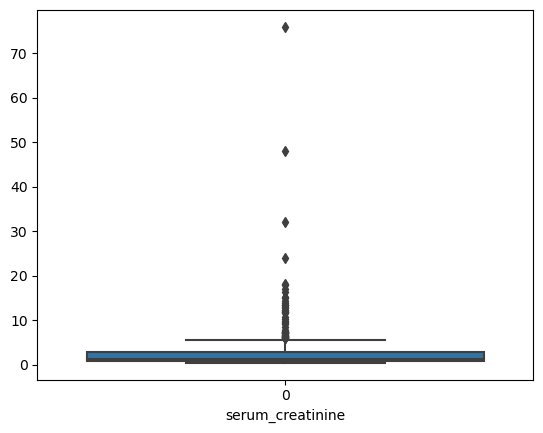

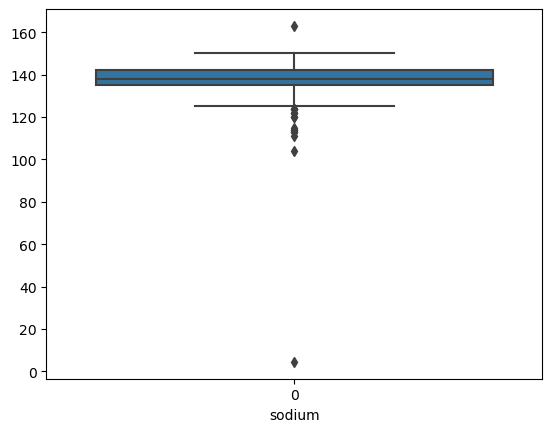

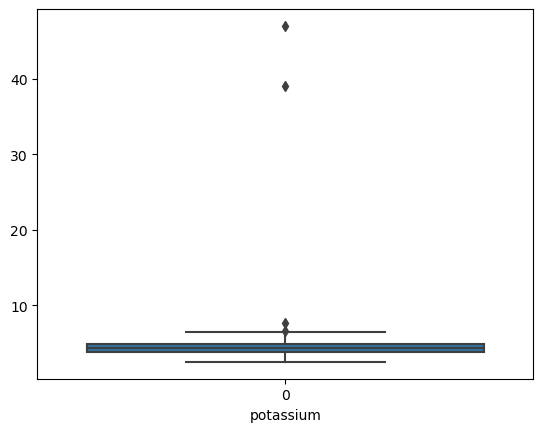

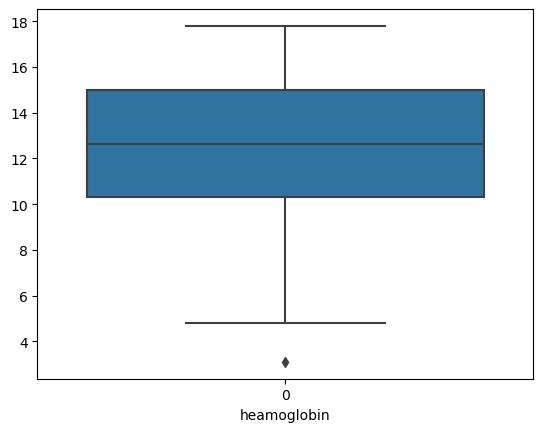

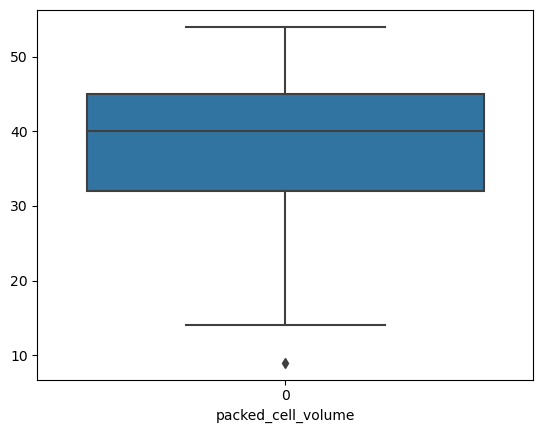

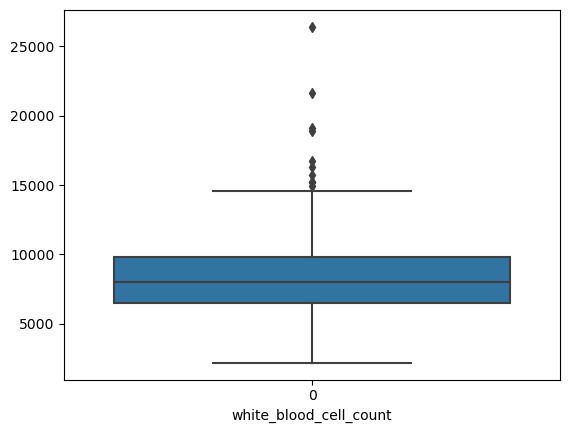

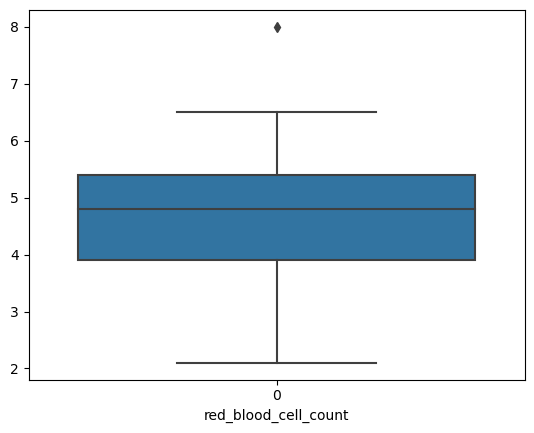

In [64]:
def box(col):
    sns.boxplot(df1[col])
    plt.xlabel(i)
    plt.show()
    
for i in list(df1.select_dtypes(exclude=["object"]).columns):
    box(i)

# SEPERATING FEATURE AND TARGET COLUMN

In [65]:
x=newdf.iloc[:,:-1]
y=newdf.iloc[:,-1]

# SEPERATING TRAINING AND TESTING DATA

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

# STANDARDIZATION(SCALING)

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [68]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
l=LinearRegression()
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()

# BUILD THE ML MODEL

In [70]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    print(f"Training {train} and Testing {test}")
    print(confusion_matrix(ytest,ypred))
    print(classification_report(ytest,ypred))
    
    
    
    return(model)

### LINEAR REGRESSION

In [71]:
l.fit(xtrain,ytrain)
ypred=l.predict(xtest)
    
train=l.score(xtrain,ytrain)
test=l.score(xtest,ytest)
print(f"Training {train} and Testing {test}")
print(r2_score(ytest,ypred))

Training 0.756336201306195 and Testing 0.735846761935918
0.735846761935918


### LOGISTIC REGRESSION

In [72]:
mymodel(lr)

Training 0.996875 and Testing 0.9875
[[47  0]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



LogisticRegression()

### Hypertuning Logistic Regression

In [73]:
lr=LogisticRegression(solver='sag')
mymodel(lr)

Training 0.996875 and Testing 0.9875
[[47  0]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



LogisticRegression(solver='sag')

### SVM

In [74]:
mymodel(svm)

Training 1.0 and Testing 0.9875
[[46  1]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



SVC()

In [75]:
svm=SVC(kernel="linear")
mymodel(svm)

Training 0.996875 and Testing 0.9875
[[47  0]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



SVC(kernel='linear')

In [76]:
svm=SVC(kernel="poly")
mymodel(svm)

Training 0.990625 and Testing 0.95
[[43  4]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        47
           1       0.89      1.00      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



SVC(kernel='poly')

In [77]:
svm=SVC(kernel="sigmoid")
mymodel(svm)

Training 0.9875 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



SVC(kernel='sigmoid')

### DECISION TREE

In [78]:
mymodel(dt)

Training 1.0 and Testing 0.9375
[[47  0]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        47
           1       1.00      0.85      0.92        33

    accuracy                           0.94        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



DecisionTreeClassifier()

### Pruning Techniques

### max_depth

In [79]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    
    
    print(f" at max depth {i} accuracyscore {accuracy_score(ytest,ypred)}")

 at max depth 1 accuracyscore 0.85
 at max depth 2 accuracyscore 0.925
 at max depth 3 accuracyscore 0.9375
 at max depth 4 accuracyscore 0.9375
 at max depth 5 accuracyscore 0.9375
 at max depth 6 accuracyscore 0.9375
 at max depth 7 accuracyscore 0.9375
 at max depth 8 accuracyscore 0.9375
 at max depth 9 accuracyscore 0.9375
 at max depth 10 accuracyscore 0.9375
 at max depth 11 accuracyscore 0.9375
 at max depth 12 accuracyscore 0.9375
 at max depth 13 accuracyscore 0.9375
 at max depth 14 accuracyscore 0.9375
 at max depth 15 accuracyscore 0.9375
 at max depth 16 accuracyscore 0.9375
 at max depth 17 accuracyscore 0.9375
 at max depth 18 accuracyscore 0.9375
 at max depth 19 accuracyscore 0.9375
 at max depth 20 accuracyscore 0.9375
 at max depth 21 accuracyscore 0.9375
 at max depth 22 accuracyscore 0.9375
 at max depth 23 accuracyscore 0.9375
 at max depth 24 accuracyscore 0.9375
 at max depth 25 accuracyscore 0.9375
 at max depth 26 accuracyscore 0.9375
 at max depth 27 accurac

In [80]:
dt2=DecisionTreeClassifier(max_depth=1)
dt2.fit(xtrain,ytrain)
ypred=dt2.predict(xtest)
  
train=dt2.score(xtrain,ytrain)
test=dt2.score(xtest,ytest)
print(f" at max depth {1} accuracy score {accuracy_score(ytest,ypred)},training {train},testing {test}")


 at max depth 1 accuracy score 0.85,training 0.86875,testing 0.85


### min_sample_leaf

In [81]:
for i in range(1,30):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
 
    train=dt3.score(xtrain,ytrain)
    test=dt3.score(xtest,ytest)
    print(f" at min_samples_leaf{i} accuracy score {accuracy_score(ytest,ypred)},training {train},testing {test}")

 at min_samples_leaf1 accuracy score 0.9375,training 1.0,testing 0.9375
 at min_samples_leaf2 accuracy score 0.9375,training 0.99375,testing 0.9375
 at min_samples_leaf3 accuracy score 0.925,training 0.996875,testing 0.925
 at min_samples_leaf4 accuracy score 0.9375,training 0.9875,testing 0.9375
 at min_samples_leaf5 accuracy score 0.9375,training 0.9875,testing 0.9375
 at min_samples_leaf6 accuracy score 0.9375,training 0.978125,testing 0.9375
 at min_samples_leaf7 accuracy score 0.9375,training 0.978125,testing 0.9375
 at min_samples_leaf8 accuracy score 0.925,training 0.96875,testing 0.925
 at min_samples_leaf9 accuracy score 0.925,training 0.96875,testing 0.925
 at min_samples_leaf10 accuracy score 0.925,training 0.96875,testing 0.925
 at min_samples_leaf11 accuracy score 0.9125,training 0.9625,testing 0.9125
 at min_samples_leaf12 accuracy score 0.9125,training 0.9625,testing 0.9125
 at min_samples_leaf13 accuracy score 0.9125,training 0.9625,testing 0.9125
 at min_samples_leaf14

In [82]:
dt4=DecisionTreeClassifier(min_samples_leaf=1)
dt4.fit(xtrain,ytrain)
ypred=dt4.predict(xtest)
  
train=dt2.score(xtrain,ytrain)
test=dt2.score(xtest,ytest)
print(f" at max depth {1} accuracy score {accuracy_score(ytest,ypred)},training {train},testing {test}")

 at max depth 1 accuracy score 0.9375,training 0.86875,testing 0.85


# PCA 

In [83]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)

In [84]:
xtrain=pca.fit_transform(xtrain)
pca.explained_variance_ratio_

array([0.23947959, 0.10305991, 0.08581107, 0.06059984, 0.05836434,
       0.04670472, 0.04407502])

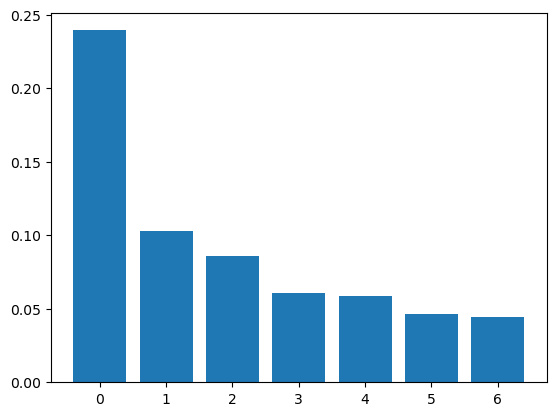

In [85]:
plt.bar(range(0,7),pca.explained_variance_ratio_)
plt.show()

In [86]:
xtest=pca.transform(xtest)

In [87]:
lr1=LogisticRegression()  #best
mymodel(lr1)

Training 0.9875 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



LogisticRegression()

In [88]:
mymodel(dt)

Training 1.0 and Testing 0.95
[[45  2]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.94      0.94      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



DecisionTreeClassifier()

In [89]:
mymodel(svm)

Training 0.975 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



SVC(kernel='sigmoid')

In [90]:
svml=SVC(kernel="linear")
mymodel(svml)

Training 0.9875 and Testing 0.9625
[[46  1]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.97      0.94      0.95        33

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



SVC(kernel='linear')

In [91]:
svmp=SVC(kernel="poly")
mymodel(svmp)

Training 0.9875 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



SVC(kernel='poly')

In [92]:
svms=SVC(kernel="sigmoid")
mymodel(svms)

Training 0.975 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



SVC(kernel='sigmoid')

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid={"C":[1,10],"gamma":[1,10],"kernel":["rbf"]}

In [95]:
gs=GridSearchCV(svm,param_grid,verbose=2)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1,

In [96]:
svm=gs.best_estimator_
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [97]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[47  0]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.91      0.95        33

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [98]:
mymodel(svm)

Training 1.0 and Testing 0.9625
[[47  0]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.91      0.95        33

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



SVC(C=10, gamma=1)

# Ensemble Techniques

In [99]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())


In [100]:
mymodel(bg)

Training 0.984375 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



BaggingClassifier(estimator=LogisticRegression())

In [101]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(SVC())
mymodel(bg)


Training 0.990625 and Testing 0.9875
[[46  1]
 [ 0 33]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



BaggingClassifier(estimator=SVC())

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
mymodel(rf)

Training 1.0 and Testing 0.95
[[46  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.97      0.91      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



RandomForestClassifier()

In [103]:
from sklearn.ensemble import VotingClassifier
models=[]
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
vc=VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
mymodel(vc)

Training 0.996875 and Testing 0.95
[[46  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.97      0.91      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.94      0.95        80
weighted avg       0.95      0.95      0.95        80



VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier())])

In [104]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [105]:
mymodel(ad)

Training 1.0 and Testing 0.95
[[45  2]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.94      0.94      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



AdaBoostClassifier()

In [106]:
mymodel(gb)

Training 1.0 and Testing 0.9375
[[45  2]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



GradientBoostingClassifier()

In [107]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mymodel(xgb)

Training 1.0 and Testing 0.9375
[[45  2]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
models=[lr1,svm,svml,svmp,svms,dt,ad,gb,bg,rf,xgb]
acc=[]
train=[]
test=[]
report=[]
for i in models:
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    train.append(i.score(xtrain,ytrain))
    test.append(i.score(xtest,ytest))
    acc.append(accuracy_score(ytest,ypred)*100)
    

In [109]:
labels=['LogisticRegression()','SVC(C=10, gamma=1)',
 'SVC(kernel=linear)',
 'SVC(kernel=poly)',
 'SVC(kernel=sigmoid)',
 'DecisionTreeClassifier()',
 'AdaBoostClassifier()',
 'GradientBoostingClassifier()',
 'BaggingClassifier(estimator=SVC())',
 'RandomForestClassifier()',
 'XGBClassifier()']

In [110]:
train

[0.9875, 1.0, 0.9875, 0.9875, 0.975, 1.0, 1.0, 1.0, 0.9875, 1.0, 1.0]

In [111]:
test

[0.975,
 0.9625,
 0.9625,
 0.975,
 0.975,
 0.9375,
 0.95,
 0.9375,
 0.9875,
 0.95,
 0.9375]

In [112]:
m={"Model":labels,"Accuracy":acc,"Training_score":train,"Testing_score":test}
model_df=pd.DataFrame(m)
model_df


Model  Accuracy  Training_score  \
0                 LogisticRegression()     97.50          0.9875   
1                   SVC(C=10, gamma=1)     96.25          1.0000   
2                   SVC(kernel=linear)     96.25          0.9875   
3                     SVC(kernel=poly)     97.50          0.9875   
4                  SVC(kernel=sigmoid)     97.50          0.9750   
5             DecisionTreeClassifier()     93.75          1.0000   
6                 AdaBoostClassifier()     95.00          1.0000   
7         GradientBoostingClassifier()     93.75          1.0000   
8   BaggingClassifier(estimator=SVC())     98.75          0.9875   
9             RandomForestClassifier()     95.00          1.0000   
10                     XGBClassifier()     93.75          1.0000   

    Testing_score  
0          0.9750  
1          0.9625  
2          0.9625  
3          0.9750  
4          0.9750  
5          0.9375  
6          0.9500  
7          0.9375  
8          0.9875  
9          0.9500  
10         0.9375

In [113]:
labels=[lr1,svm,svml,svmp,svms,dt,ad,gb,bg,rf,xgb]
acc=[]
train=[]
test=[]
for i in labels:
    print(i)
    mymodel(i)
    
    

LogisticRegression()
Training 0.9875 and Testing 0.975
[[46  1]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

SVC(C=10, gamma=1)
Training 1.0 and Testing 0.9625
[[47  0]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.91      0.95        33

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

SVC(kernel='linear')
Training 0.9875 and Testing 0.9625
[[46  1]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1      

In [114]:
model_df

Model  Accuracy  Training_score  \
0                 LogisticRegression()     97.50          0.9875   
1                   SVC(C=10, gamma=1)     96.25          1.0000   
2                   SVC(kernel=linear)     96.25          0.9875   
3                     SVC(kernel=poly)     97.50          0.9875   
4                  SVC(kernel=sigmoid)     97.50          0.9750   
5             DecisionTreeClassifier()     93.75          1.0000   
6                 AdaBoostClassifier()     95.00          1.0000   
7         GradientBoostingClassifier()     93.75          1.0000   
8   BaggingClassifier(estimator=SVC())     98.75          0.9875   
9             RandomForestClassifier()     95.00          1.0000   
10                     XGBClassifier()     93.75          1.0000   

    Testing_score  
0          0.9750  
1          0.9625  
2          0.9625  
3          0.9750  
4          0.9750  
5          0.9375  
6          0.9500  
7          0.9375  
8          0.9875  
9          0.9500  
10         0.9375

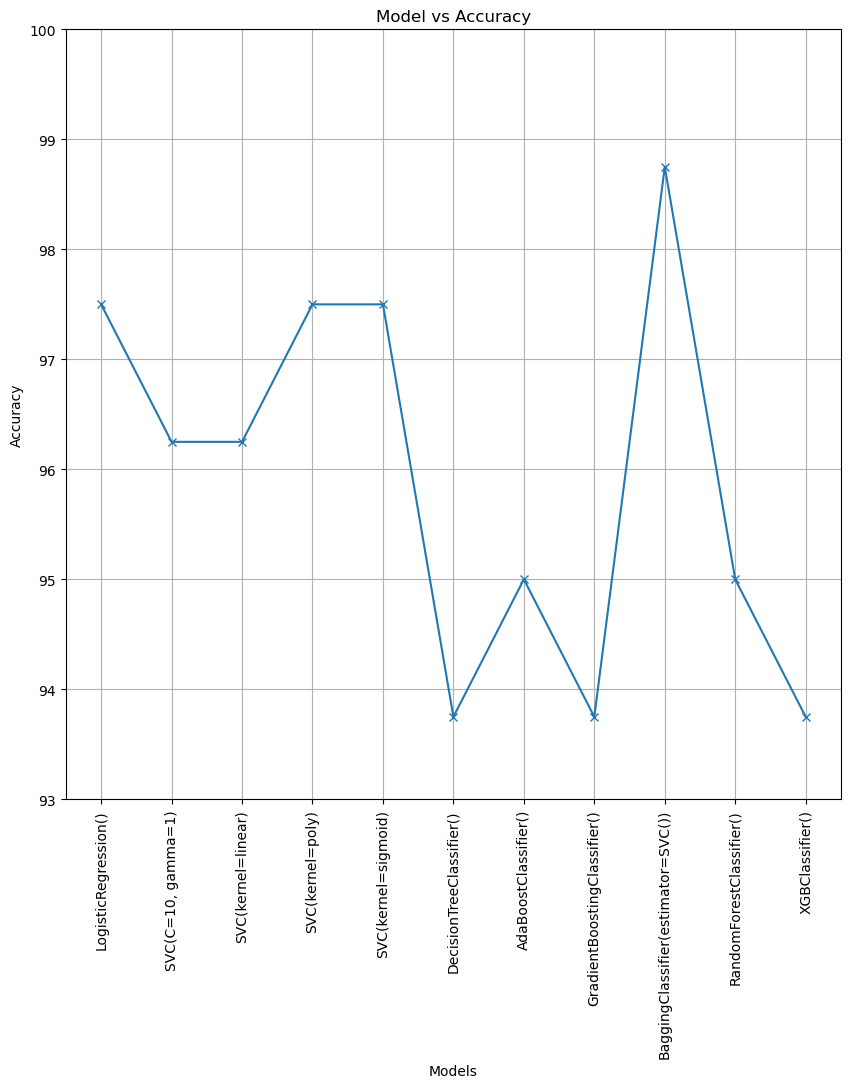

In [115]:
plt.figure(figsize=(10,10))
plt.plot(model_df["Model"],model_df["Accuracy"],marker="x")
plt.title("Model vs Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(93,100)
plt.xticks(rotation=90)
plt.grid()
plt.show()

# OVERVIEW:

# Conclusion:

This machine learning project aims to provide a valuable tool for early detection and progression prediction of CKD. 
By leveraging data-driven insights, healthcare professionals can identify high-risk individuals early on, allowing for timely intervention and personalized care. 
The model's success will be measured by its accuracy, reliability, and practicality in real-world healthcare settings. 
Ultimately, the project contributes to the broader goal of improving patient outcomes and reducing the burden of CKD on global health systems.